In [4]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"
# Read the City and Ride Data
city_df = pd.read_csv(city_data_to_load)
ride_df = pd.read_csv(ride_data_to_load)
# Combine the data into a single dataset
df = pd.merge(ride_df, city_df, how="left")
# Display the data table for preview
df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


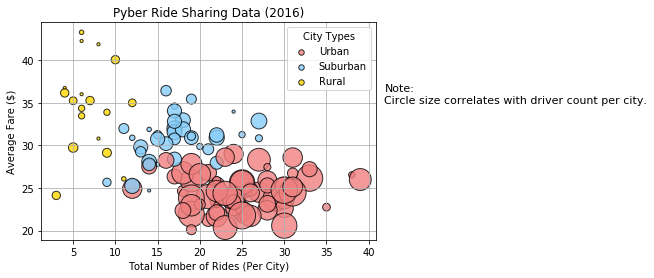

In [14]:
### Bubble Plot of Ride Sharing Data
# Obtain the x and y coordinates for each of the three city types
xlim = df.groupby("city")["city"].count()
ylim = df.groupby("city")["fare"].mean()
slim = df.groupby("city")["driver_count"].min()
clim = df.groupby("city")['type'].unique().str[0]

# Build the scatter plots for each city types
bubble_df = pd.DataFrame({
    "average fare":ylim, 
    "total rides":xlim, 
    "driver_count":slim,
    "type":clim
})

def set_color(c):
    if c == 'Urban':
        return 'lightcoral'
    elif c == 'Rural':
        return 'Gold'
    else:
        return 'lightskyblue'
    
colorList = list(bubble_df['type'])
colorList = [set_color(y) for y in colorList]

bubble_df['Color'] = colorList
bubble_df.head()
    
PyberPlot1 = bubble_df.plot.scatter('total rides','average fare', c=bubble_df['Color'], s=(bubble_df['driver_count']*10), alpha=0.8, edgecolors='black')

# Incorporate the other graph properties
plt.grid()
plt.title('Pyber Ride Sharing Data (2016)')
plt.xlabel('Total Number of Rides (Per City)')
plt.ylabel('Average Fare ($)')

# Create a legend
for myType in ['Urban', 'Suburban', 'Rural']:
    plt.scatter([], [], s=30, label=myType, c=set_color(myType), edgecolors='black', alpha=0.8)
plt.legend(scatterpoints=1, frameon=True, title='City Types')

# Incorporate a text label regarding circle size
textstr = 'Note:\nCircle size correlates with driver count per city.'
plt.text(0.92, 0.6, textstr, fontsize=11, transform=plt.gcf().transFigure)

# Save Figure
plt.savefig('bubble_plot.png')
# Show plot
plt.show()

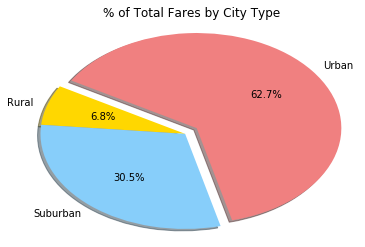

In [16]:
### Total Fares by City Type
# Calculate Type Percents
total_fare = df.groupby(['type'])['fare'].sum().to_dict()
sizes = total_fare.values()
labels = total_fare.keys()
explode = (0, 0, 0.1)
colors = ['gold','lightskyblue','lightcoral']
# Build Pie Chart
plt.pie(sizes, explode=explode, labels=labels, colors=colors, shadow=True, startangle=150, autopct="%1.1f%%")
plt.axis('auto')
plt.title('% of Total Fares by City Type', fontsize=12)
# Save Figure
plt.savefig('total_fare.png')
# Show Figure
plt.show()

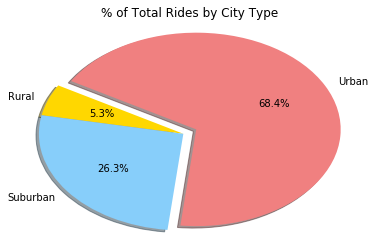

In [22]:
### Total Rides by City Type
# Calculate Ride Percents
total_rides = df.groupby(['type'])['ride_id'].count().to_dict()
sizes1 = total_rides.values()
labels1 = total_rides.keys()
explode = (0, 0, 0.1)
colors = ['gold','lightskyblue','lightcoral']
# Build Pie Chart
plt.pie(sizes1, explode=explode, labels=labels1, colors=colors, shadow=True, startangle=150, autopct="%1.1f%%")
plt.axis('auto')
plt.title('% of Total Rides by City Type', fontsize=12)
# Save Figure
plt.savefig('total_rides.png')
# Show Figure
plt.show()

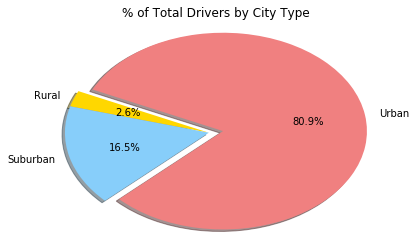

In [21]:
### Total Drivers by City Type
# Calculate Driver Percents
total_drivers = bubble_df.groupby(['type'])['driver_count'].sum().to_dict()
# Build Pie Charts
sizes2 = total_drivers.values()
labels2 = total_drivers.keys()
explode = (0, 0, 0.1)
colors = ['gold','lightskyblue','lightcoral']
plt.pie(sizes2, explode = explode, labels=labels2, colors=colors, shadow=True, startangle=155, autopct="%1.1f%%")
plt.axis('auto')
plt.title('% of Total Drivers by City Type', fontsize=12)

# Save Figure
plt.savefig('total_drivers.png')
# Show Figure
plt.show()
